# Face detection


In [1]:
import matplotlib.pyplot as plt #for plotting images
from skimage.feature import hog #Using HOG to describe structural shape and appearance of object in the image.
from skimage import data,exposure #Used to extract data from image and functions of exposure module
import face_recognition #for face recognition
import cv2 #for image processing


In [2]:
image= cv2.imread('Daniel.jpg') #reading the image
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #changing the colour to RGB(red,green and blue)

In [3]:
fd,hog_img=hog(image,orientations=8, pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True) #object Classification using HOG

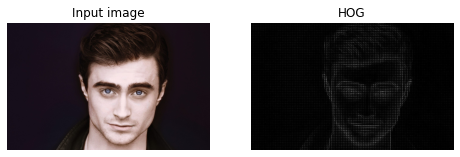

In [4]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True) #plotting the image
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_img_rescaled=exposure.rescale_intensity(hog_img,in_range=(0,10)) #plotting image after HOG classification
ax2.axis('off')
ax2.imshow(hog_img_rescaled,cmap=plt.cm.gray)
ax2.set_title('HOG')
plt.show()

In [5]:
len(fd) #length of the image after HOG classification

72000

In [6]:
image.shape #dimensions of original image

(1200, 1920, 3)

In [7]:
from matplotlib.patches import Rectangle #using Rectangle for face detection
import numpy as np #for numerical operations
%matplotlib inline

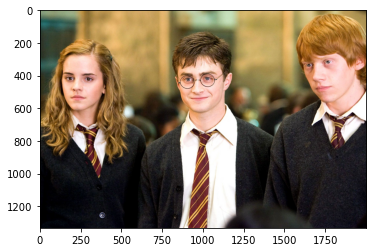

In [8]:
image=cv2.imread('H.jpg') #Reading image with 3 faces
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
face_locations=face_recognition.face_locations(image) #detecting locations of the faces

number_of_faces=len(face_locations)
print("Found {} face(s) in input image".format(number_of_faces)) #printing number of faces found in the above image

Found 3 face(s) in input image


face is located at pixel Top:111, Left:350, Bottom:379, Right:617
face is located at pixel Top:812, Left:313, Bottom:1133, Right:634
face is located at pixel Top:1561, Left:206, Bottom:1882, Right:527


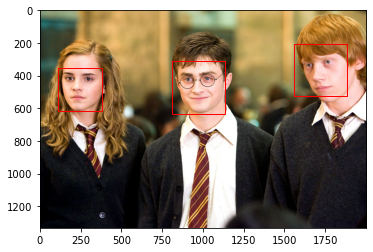

In [10]:
plt.imshow(image)
ax=plt.gca()


for face_location in face_locations: #calculating the face pixel location
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print('face is located at pixel Top:{}, Left:{}, Bottom:{}, Right:{}'.format(x,y,w,h))
    
    
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')#using rectangle around the face for face detection
    ax.add_patch(rect)


plt.show()

# Face Recognition


In [11]:
#importing 3 images which are known to us

image= cv2.imread('Her.jpg')
her=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image= cv2.imread('Harry.jpg')
harry=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image= cv2.imread('ron.jpg')
ron=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [12]:
#representing the known images as encoding
her_encoding=face_recognition.face_encodings(her)[0]
harry_encoding=face_recognition.face_encodings(harry)[0]
ron_encoding=face_recognition.face_encodings(ron)[0]

known_face_encodings=[her_encoding,harry_encoding,ron_encoding]

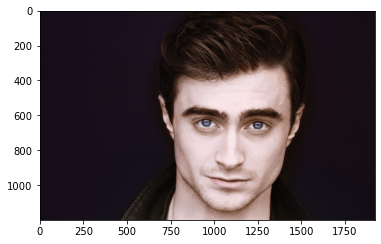

In [13]:
#importing the test or unknown image
image=cv2.imread('Daniel.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#representing the unknown image as encoding 
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [14]:
from scipy.spatial import distance #for computing the euclidean distance

for unknown_face_encoding in unknown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unknown_face_encoding)#euclidean distance between known and unknown image
        #print("Euclidean Distance",d)
        results.append(d)#storing the results in a list
    threshold=0.6
    results=np.array(results)<=0.6 #checking for the threshold value,if <=0.6 then match else not a match
    
    name="unknown"
 #Finding the most relevant match   
    if results[0]:
        name='Emma Watson'
    elif results[1]:
        name='Daniel Radclieffe'
    elif results[2]:
        name='Rupert Grint'
    
    print(f"Found {name} in the photo")
       
 

Found Daniel Radclieffe in the photo


# Face Recognition Landmark

In [15]:
#using face landmarks from face recognition module.
face_lanmdmarks_list=face_recognition.face_landmarks(unknown_image)


In [16]:
#using polygona nd lines to form border in the face.
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

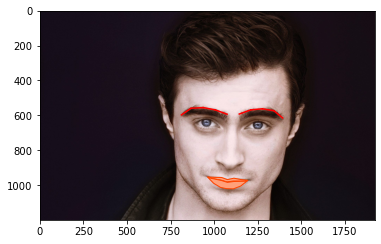

In [17]:
plt.imshow(unknown_image)
ax=plt.gca()
#using the face landmarks and extracting eyebrows and lips.
for face_landmarks in face_lanmdmarks_list:
    left_eyebrow_pts=face_landmarks['left_eyebrow']
    pre_x,pre_y=left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
        ax.add_line(l)
        pre_x,pre_y=x,y
    
    right_eyebrow_pts=face_landmarks['right_eyebrow']
    pre_x,pre_y=right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
        ax.add_line(l)
        pre_x,pre_y=x,y
    p=Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(p)
    p=Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(p)

plt.show()